In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from function import load_satisfaction
import seaborn as sns

In [3]:
dfs = load_satisfaction(path='../data/London_satisfaction/', transpose=True)

In [4]:
for key, df in dfs.items():
    print(key)
    display(HTML(df.head(5).to_html()))

happiness_score_out_10


,City of London,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,London,England,United Kingdom
2011-12,NaN,6.93,7.26,7.2,7.03,7.53,7.28,7.18,6.92,7.12,7.07,7.07,7.17,7.05,7.33,7.32,7.31,7.36,7.08,7.45,7.28,7.17,7.07,7,7.05,7.36,7.24,7.19,7.15,7.03,7.17,7.33,7.28,7.17,7.2,7.19,7.28,7.28
2012-13,7.44,6.97,7.27,7.21,7.09,7.36,7.13,7.11,7.44,7.41,7.05,7.02,6.94,7.13,7.35,7.24,7.34,7.29,6.85,7.51,7.18,6.97,7.13,7.13,7.32,7.34,7.33,7.2,7.13,7.32,7.26,7.28,7.09,7.15,7.25,7.21,7.28,7.29
2013-14,7.24,7.04,7.53,7.29,7.22,7.55,7.23,7.31,7.22,7.41,7.31,6.87,7.09,7.29,7.5,7.34,7.41,7.52,7.2,7.6,7.51,7.14,7.41,7.17,7.5,7.24,7.54,7.27,7.25,7.45,7.11,7.51,7.11,7.29,7.35,7.32,7.37,7.38
2014-15,NaN,7.24,7.46,7.39,7.36,7.48,7.22,7.39,7.48,7.44,7.17,7.18,7.34,7.27,7.51,7.28,7.31,7.56,7.16,7.46,7.49,7.34,7.23,7.51,7.56,7.45,7.48,7.43,7.51,7.26,7.42,7.39,7.41,7.33,7.42,7.38,0.11,0.1


anxiety_score_out_10


,City of London,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,London,England,United Kingdom
2011-12,7.61,3.23,3.33,3.12,2.74,3.21,3.8,3.51,3.92,3.17,3.42,3.91,2.94,3.23,2.6,3.35,3.52,3.53,3.64,3.31,3.57,3.34,3.63,3.78,3.91,3.36,3.32,3.6,3.14,3.51,3.41,3.71,3.51,3.56,3.34,3.43,3.15,3.14
2012-13,NaN,3.3,2.63,3.22,3.33,3.2,3.25,3.02,3.58,2.51,3.68,3.61,3.15,3.07,3.17,3.17,3.34,3.51,3.74,3.06,3.23,3.69,3.35,3.59,3.36,3.12,3.56,3.28,3.34,2.93,2.99,3.55,3.58,3.36,3.21,3.27,3.05,3.03
2013-14,NaN,3.57,2.61,3.4,3.15,3.18,3.38,3.39,3.37,2.53,3.13,3.84,3.33,3.2,2.65,3.15,2.96,3.16,3.43,3.11,3.05,3.52,3.32,3.31,2.74,3.13,3,3.47,3.25,3.21,3,3.36,3.18,3.32,3.09,3.18,2.94,2.93
2014-15,NaN,3.15,2.31,3.13,2.51,2.79,3.21,2.91,3.28,2.13,3.55,3.36,3.18,2.95,2.56,3,3.04,3.21,3.22,3.12,3.17,3.06,3.18,3.32,2.69,2.99,3.36,3.29,3.01,3.13,2.77,3.11,3.4,3.13,2.92,3.01,2.86,2.86


worthwhileness_score_out_10


,City of London,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,London,England,United Kingdom
2011-12,5.14,7.47,7.72,7.71,7.16,7.9,7.38,7.54,7.6,7.53,7.36,7.38,7.46,7.34,7.34,7.72,7.59,7.5,7.31,7.72,7.67,7.42,7.42,7.55,7.35,7.6,7.75,7.51,7.67,7.14,7.29,7.63,7.56,7.43,7.56,7.51,7.66,7.66
2012-13,8.23,7.57,7.79,7.75,7.32,7.8,7.37,7.46,7.48,7.57,7.49,7.42,7.6,7.44,7.53,7.65,7.63,7.6,7.22,7.92,7.45,7.4,7.71,7.54,7.51,7.44,7.69,7.68,7.57,7.56,7.72,7.55,7.44,7.52,7.58,7.56,7.68,7.69
2013-14,7.89,7.33,7.69,7.76,7.51,7.73,7.47,7.62,7.61,7.56,7.71,7.41,7.53,7.66,7.6,7.75,7.83,7.59,7.65,7.9,7.75,7.31,7.75,7.67,7.71,7.65,7.76,7.72,7.6,7.63,7.57,7.72,7.57,7.62,7.65,7.64,7.73,7.74
2014-15,NaN,7.56,7.94,7.8,7.47,7.96,7.56,7.73,7.85,7.71,7.64,7.56,7.68,7.59,7.56,7.73,7.85,7.83,7.47,7.74,7.79,7.62,7.5,7.81,7.91,7.91,7.86,7.68,7.94,7.62,7.84,7.73,7.72,7.65,7.78,7.73,7.81,7.82


life_satisfaction_score_out_10


,City of London,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,London,England,United Kingdom
2011-12,NaN,7.04,7.45,7.4,7.04,7.54,7.24,7.06,7.15,7.19,7.2,7.03,7.33,7.09,7.3,7.38,7.38,7.24,7.09,7.61,7.29,7.14,7.09,7.18,7.17,7.29,7.52,7.32,7.37,7.03,7.16,7.48,7.33,7.22,7.27,7.25,7.4,7.41
2012-13,8.1,7.06,7.35,7.47,7.23,7.63,7.22,7,7.24,7.18,7.16,7.07,7.23,7.2,7.34,7.4,7.35,7.3,7.08,7.68,7.29,7.09,7.23,7.18,7.22,7.28,7.42,7.27,7.25,7.28,7.24,7.23,7.09,7.21,7.28,7.26,7.44,7.45
2013-14,8.2,6.93,7.39,7.26,7.31,7.5,7.13,7.38,7.28,7.31,7.21,7.13,7.39,7.31,7.51,7.5,7.46,7.34,7.36,7.7,7.42,6.99,7.37,7.52,7.31,7.45,7.56,7.56,7.43,7.46,7.3,7.43,7.5,7.36,7.38,7.37,7.49,7.51
2014-15,NaN,7.33,7.58,7.55,7.27,7.7,7.29,7.36,7.64,7.45,7.31,7.42,7.55,7.38,7.46,7.58,7.63,7.63,7.36,7.65,7.54,7.43,7.35,7.62,7.56,7.59,7.53,7.44,7.63,7.54,7.66,7.46,7.53,7.45,7.53,7.5,7.6,7.61


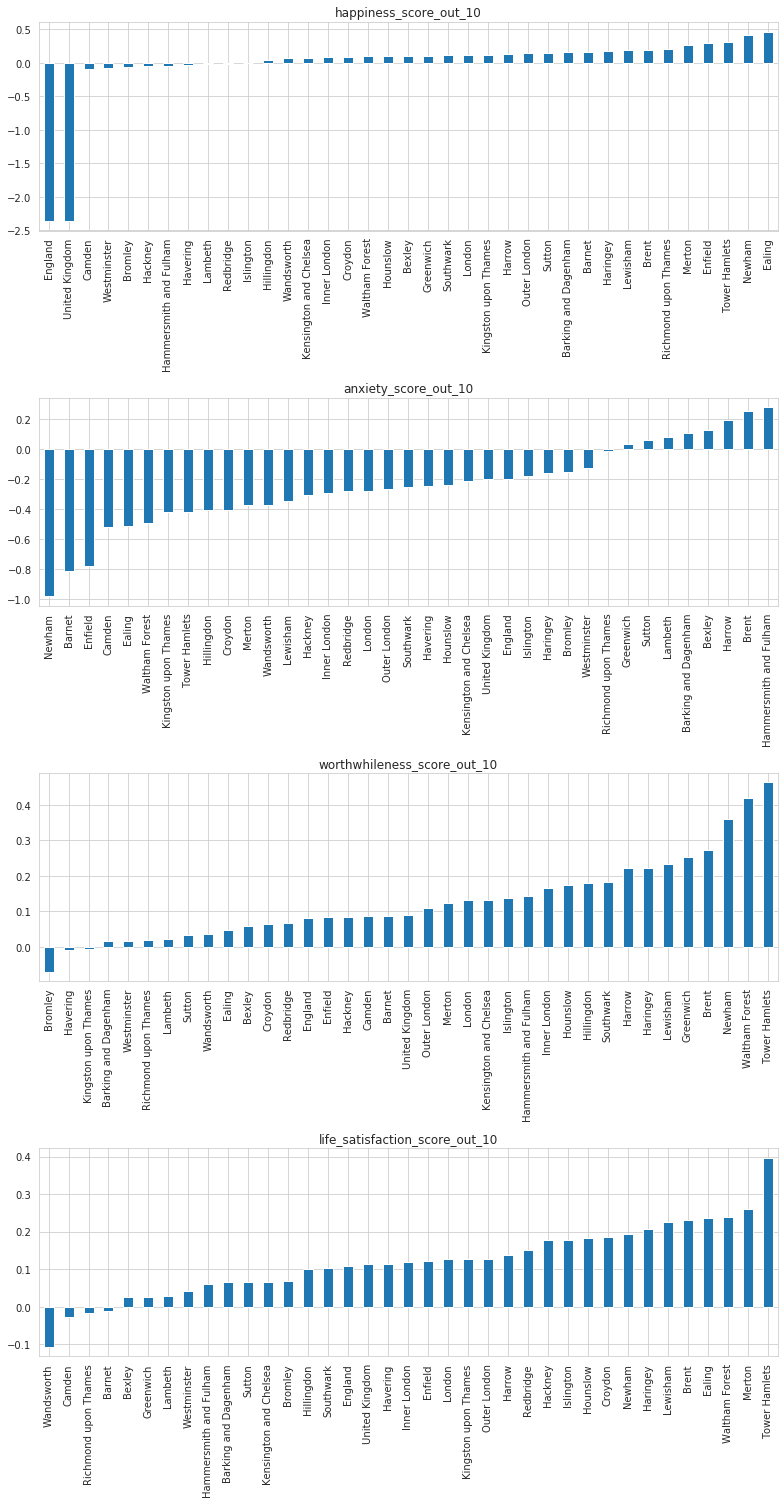

In [5]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(figsize=(11, 21), nrows=len(dfs), ncols=1)

    for ax, (key, df) in zip(axes, dfs.items()):
        # sentiment_jump measures the increase in satisfaction metric 
        # before and after the Olympics
        # Remark : do we include 2012-2013 in the pre or post? (post for now)
        pre = df.dropna(axis='columns').iloc[:1].mean(axis='rows')
        post = df.dropna(axis='columns').iloc[1:].mean(axis='rows')
        sentiment_jump = post - pre
        sentiment_jump.sort_values().plot.bar(ax=ax)
        ax.set_title(key)
    
    plt.tight_layout()
    plt.show()

## London boroughs

In [6]:
df = dfs['happiness_score_out_10']
exclusion = ['Inner London', 'Outer London', 'London', 'England', 'United Kingdom']
boroughs = [borough for borough in df.columns if borough not in exclusion]
years = df.index.unique()

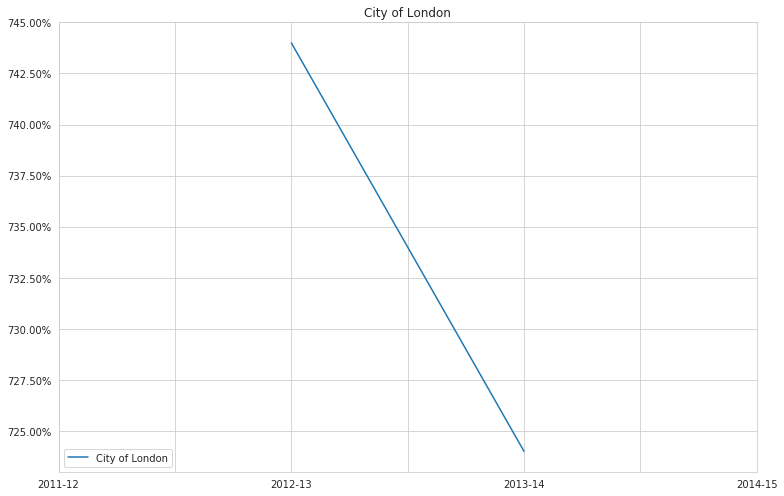

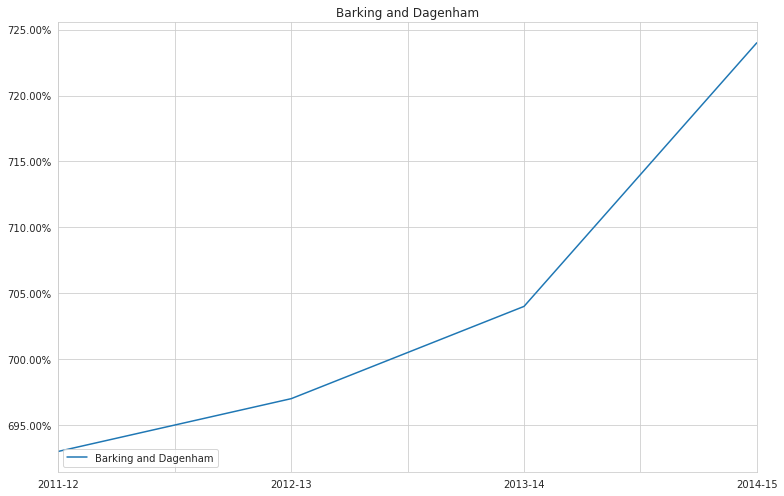

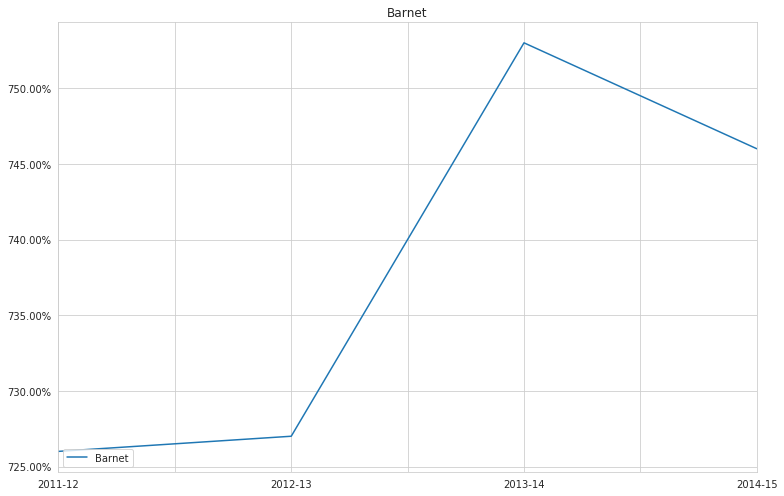

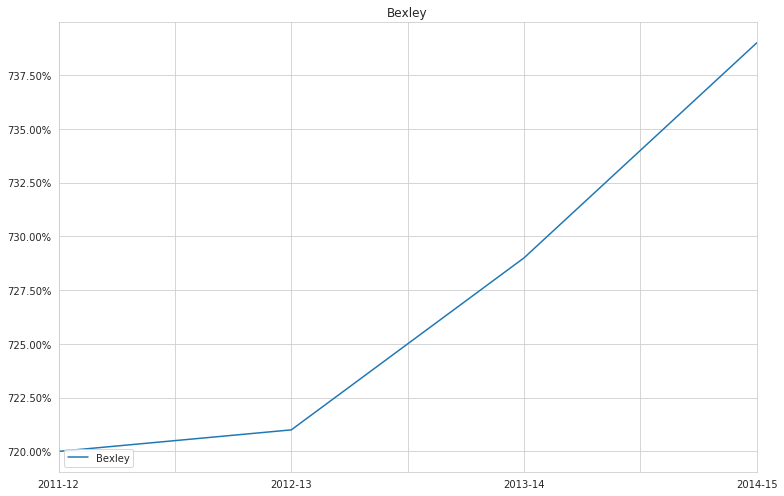

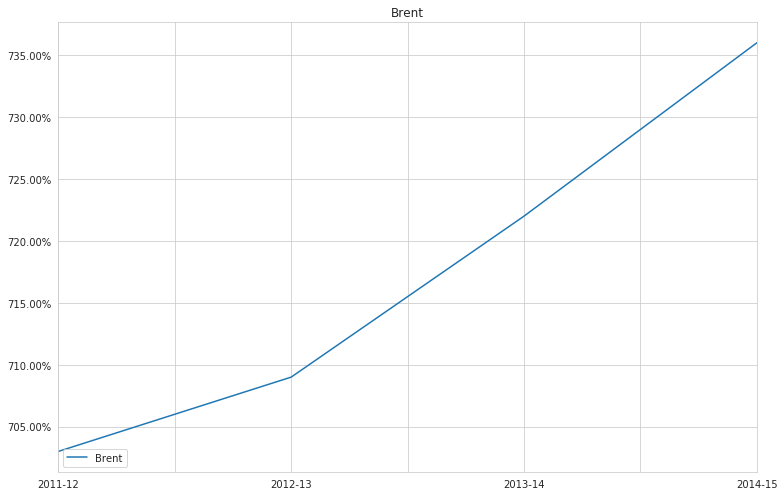

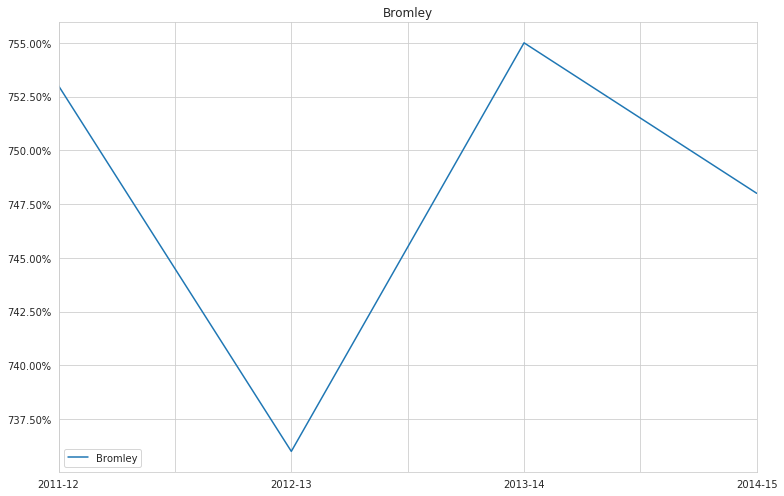

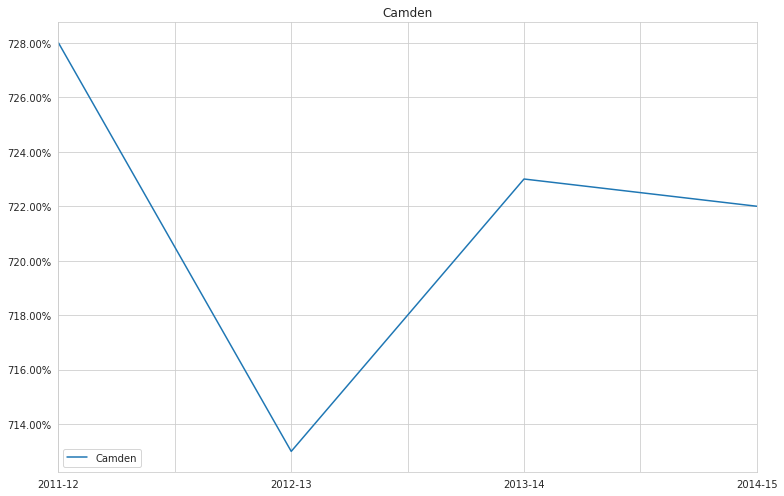

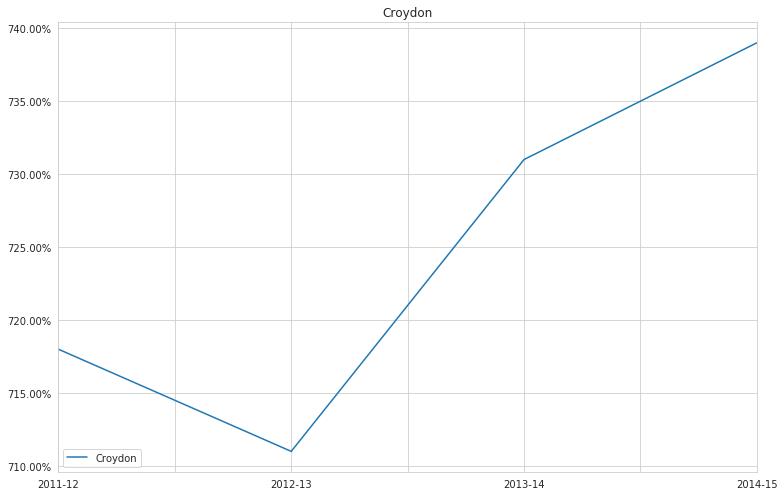

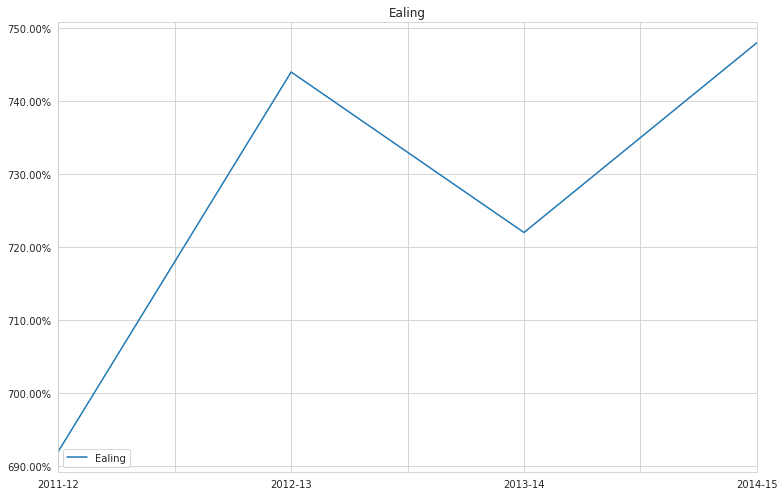

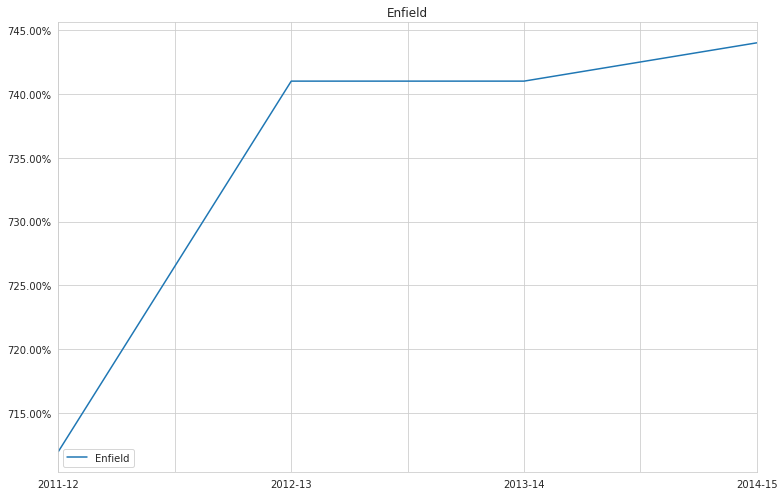

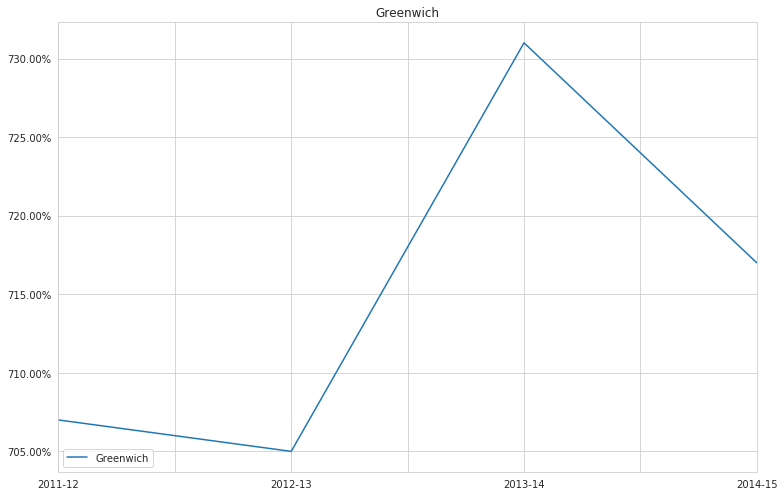

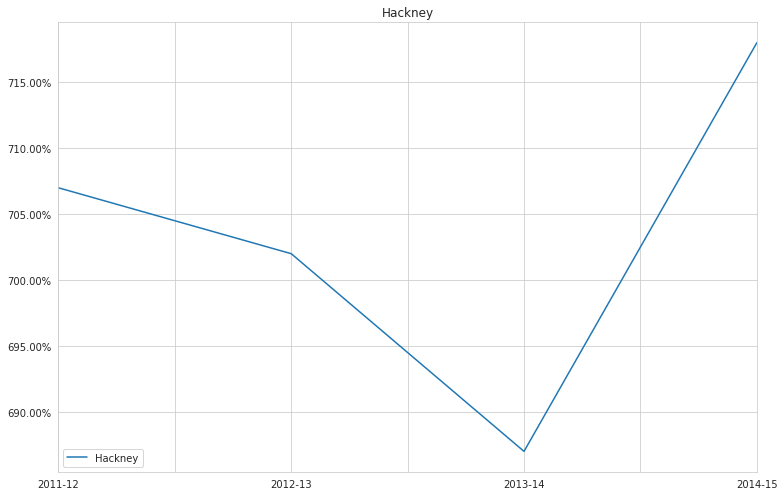

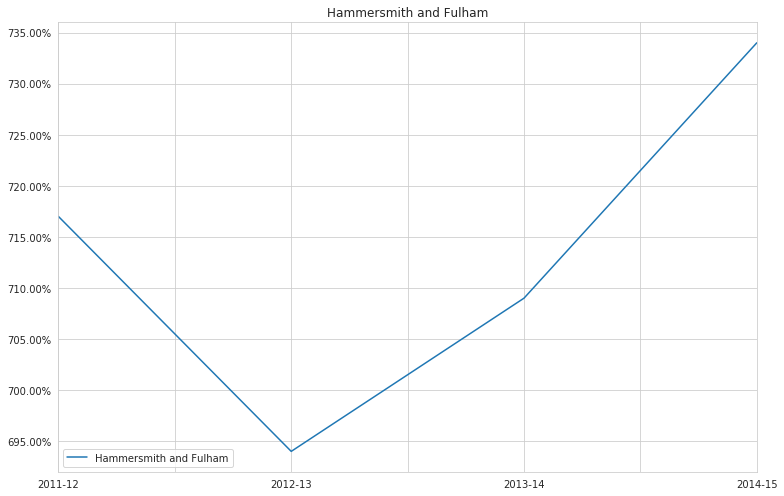

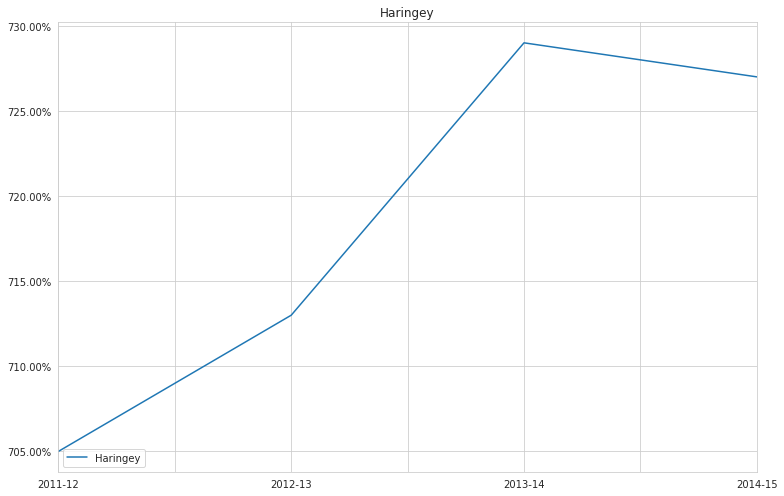

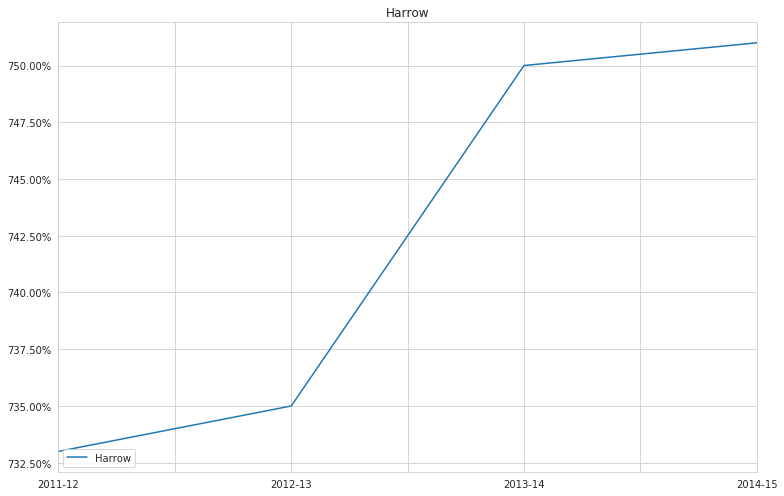

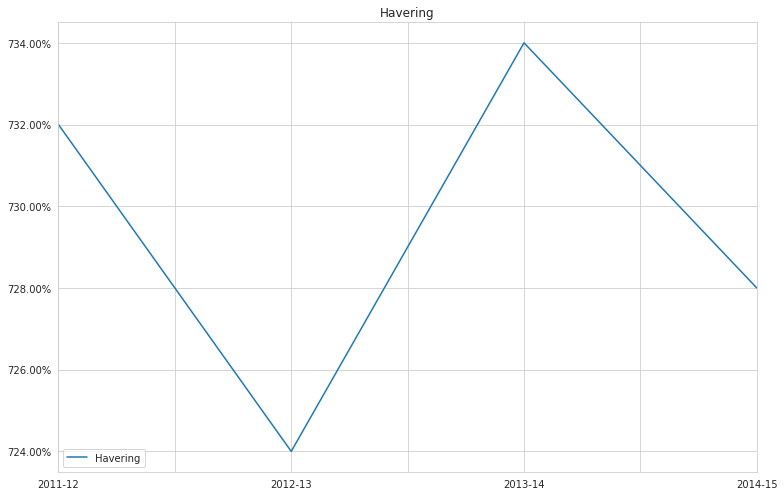

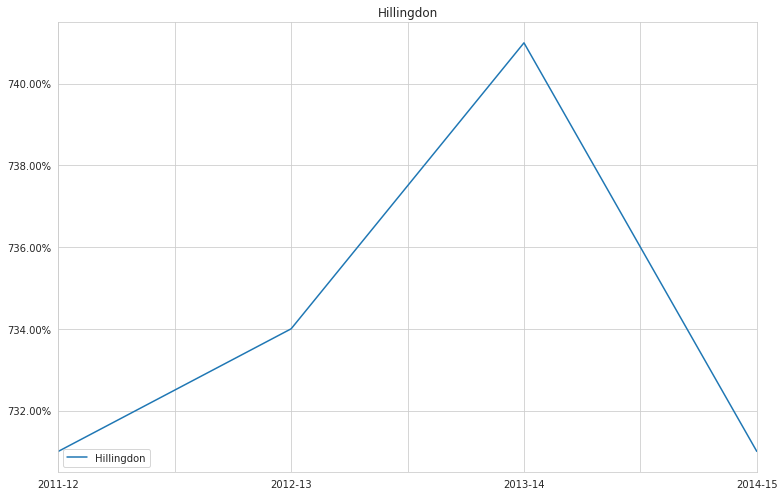

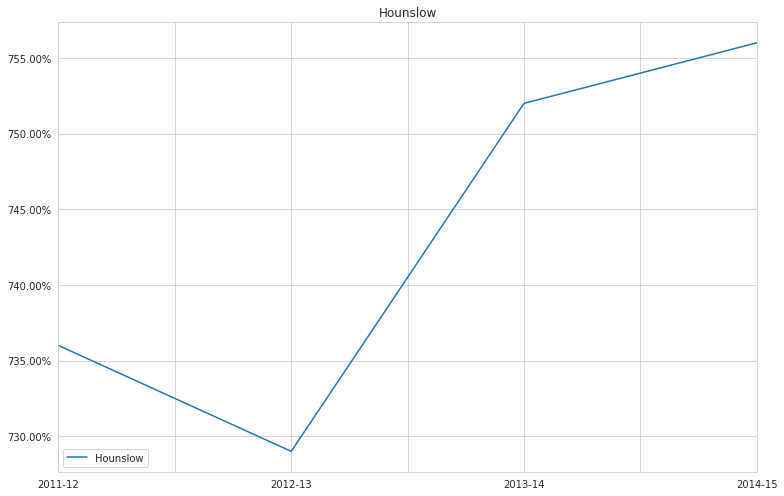

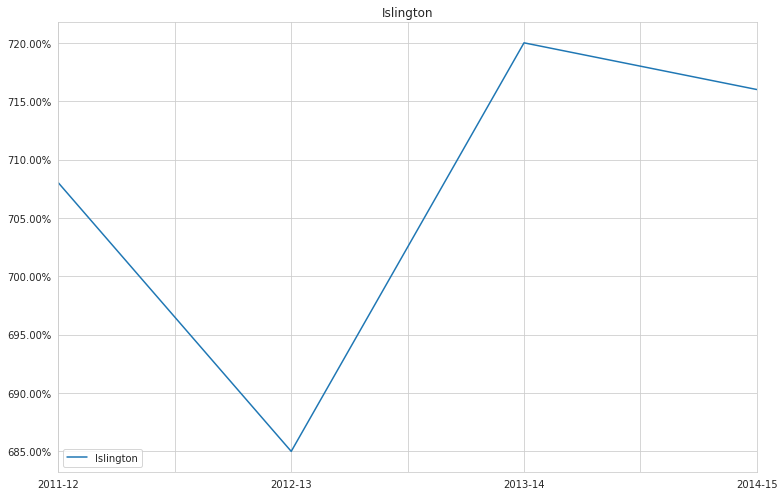

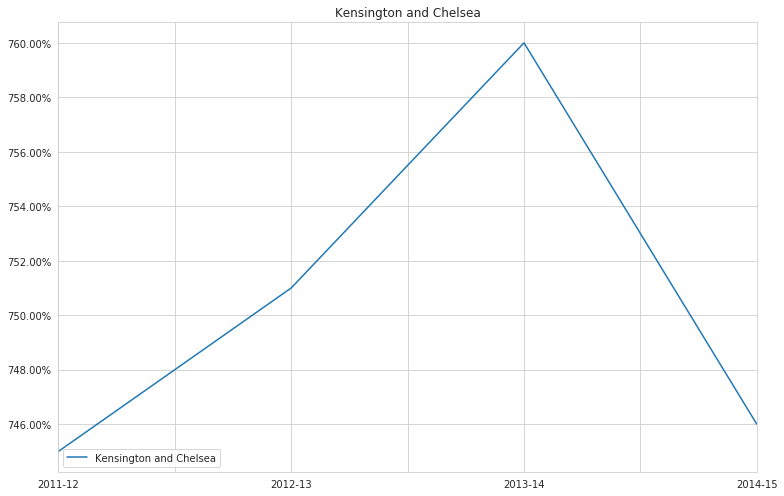

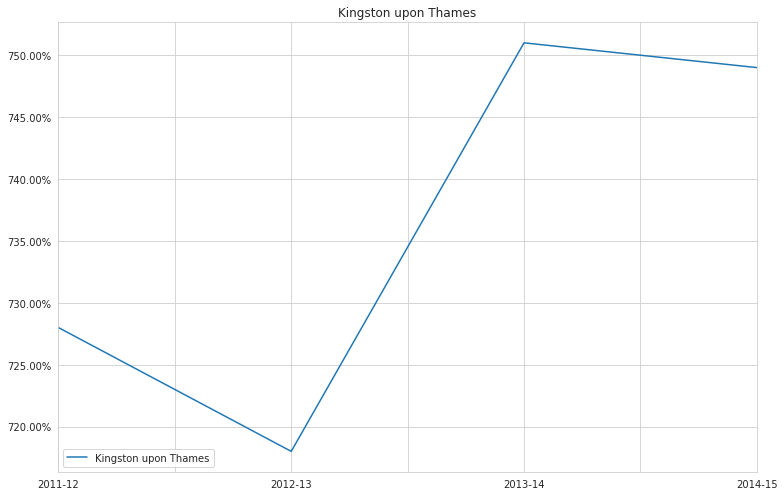

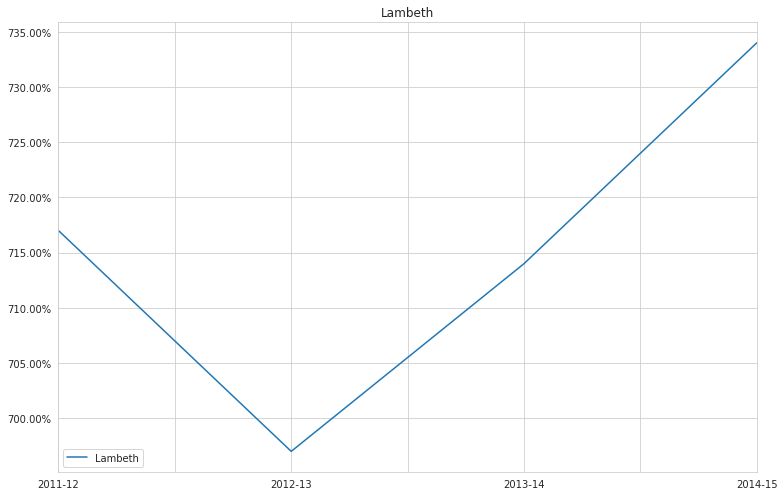

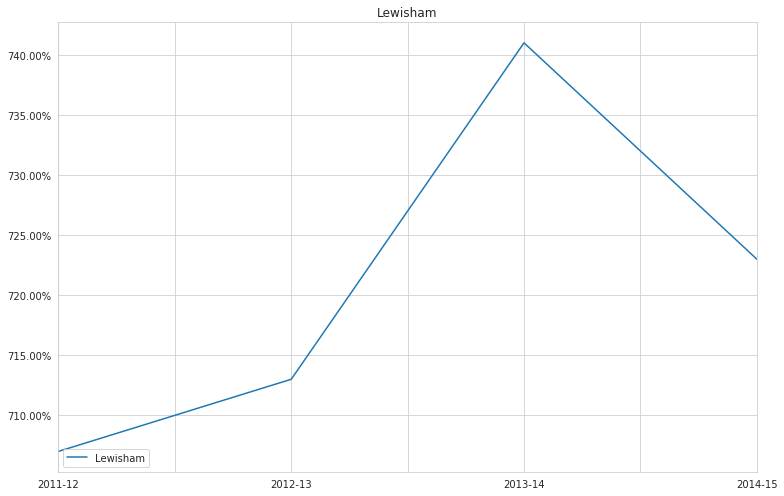

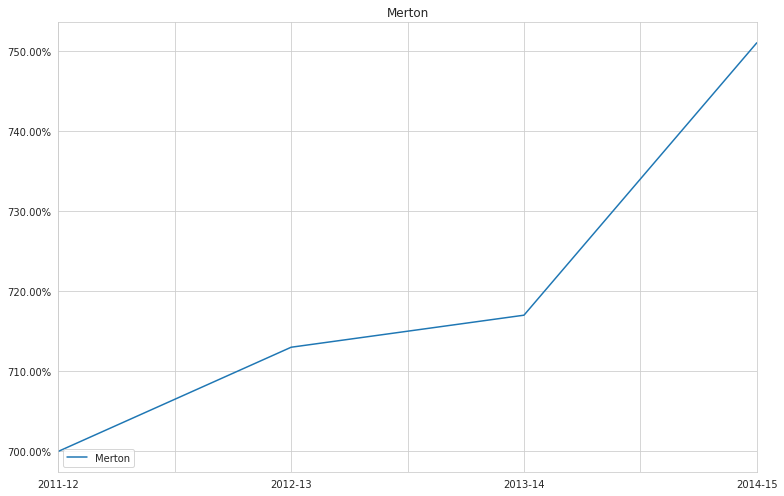

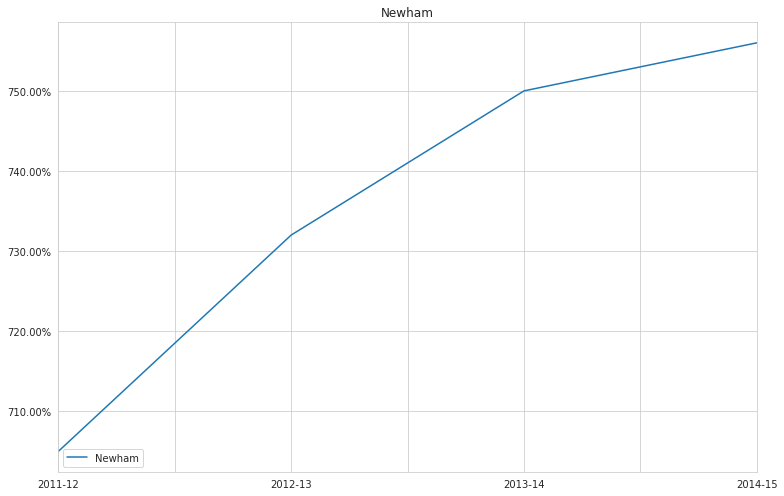

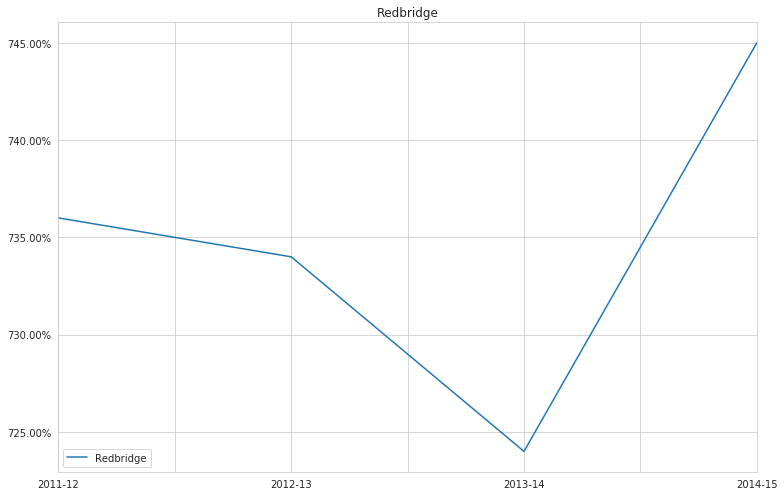

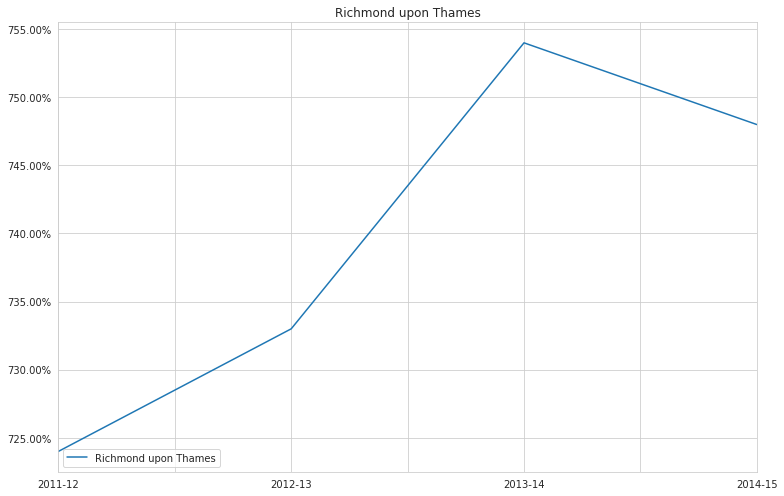

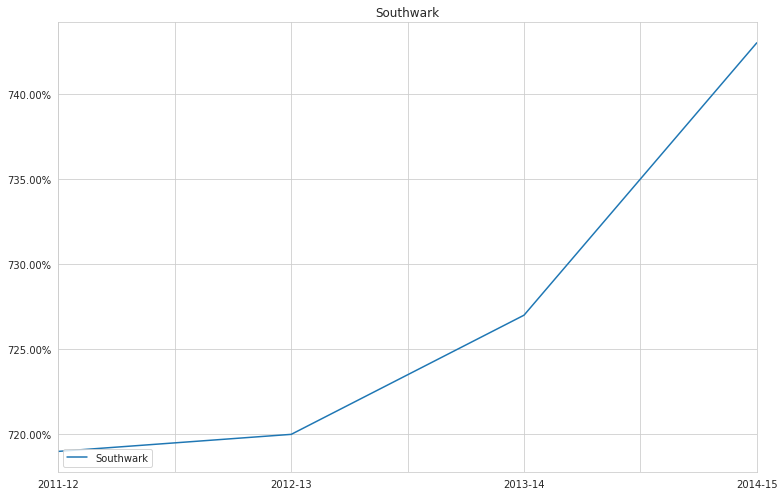

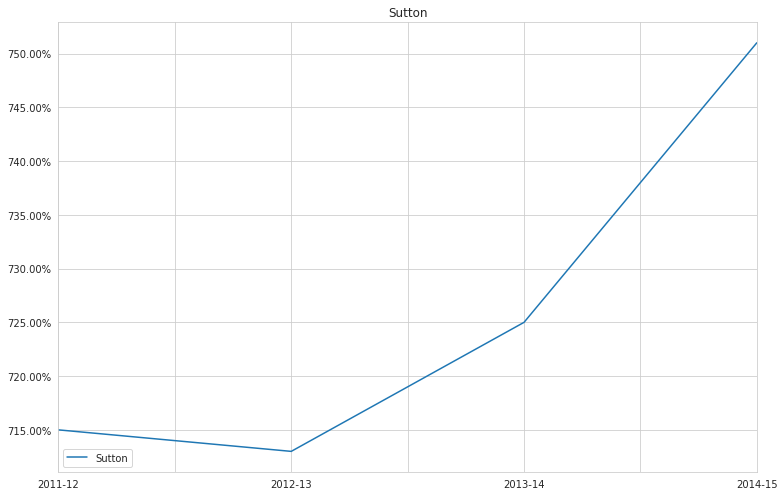

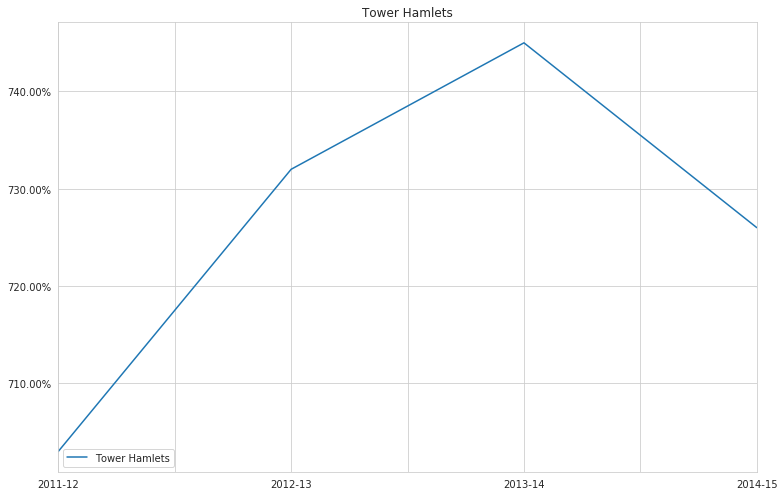

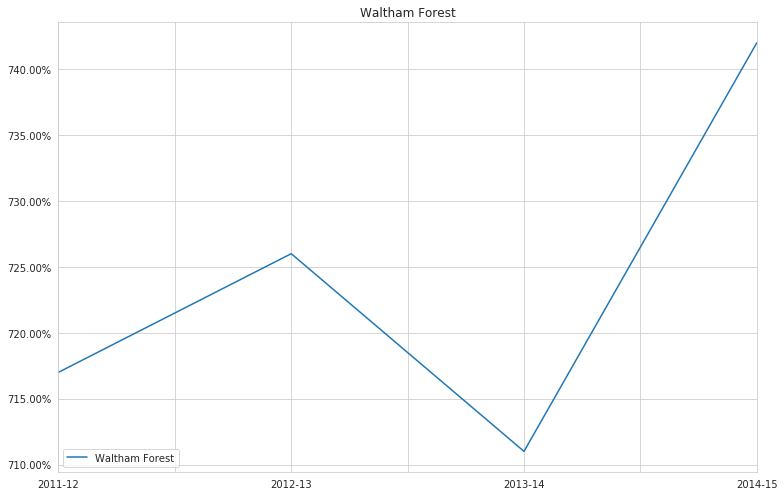

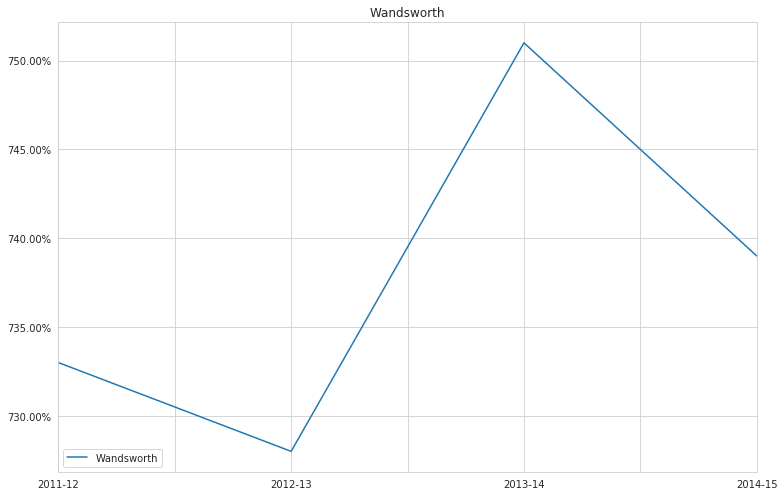

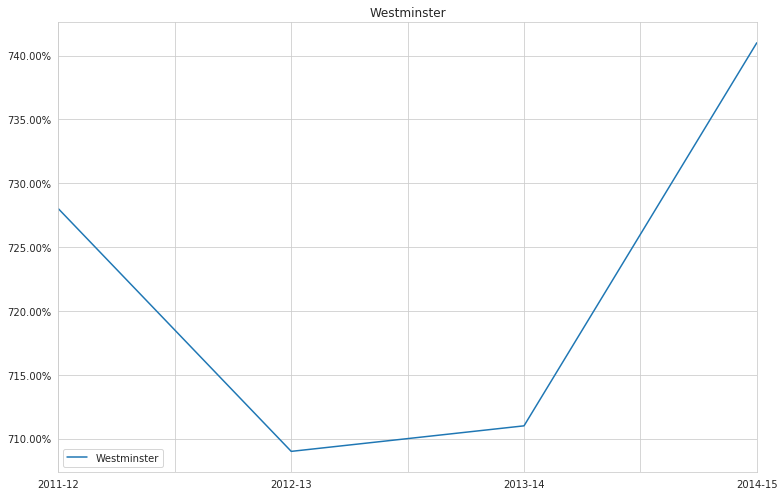

In [7]:
with sns.axes_style('whitegrid'):
    for borough in boroughs:
        fig, ax = plt.subplots(figsize=(11, 7), nrows=1, ncols=1)
        df[borough].plot(ax=ax)
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
        ax.legend(loc='lower left')
        ax.set_title(borough)
        plt.tight_layout()
        plt.show()

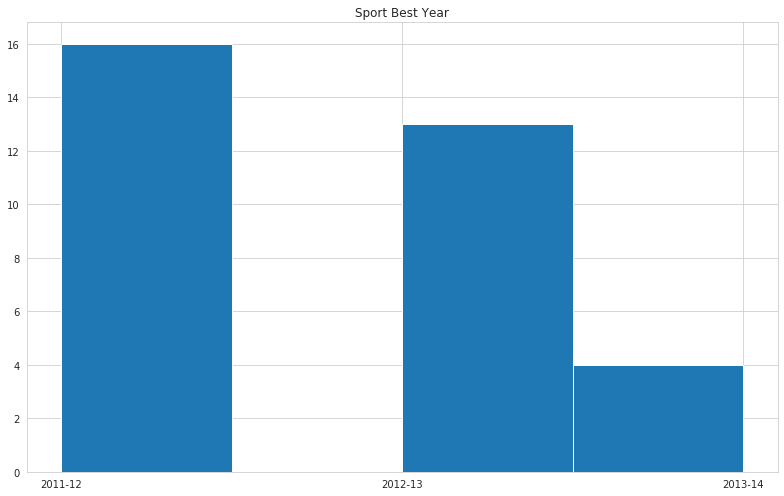

In [8]:
happy_min_year = dict()

for borough in boroughs:
    df_borough = df[borough].ffill().bfill()
    happy_min_year[borough] = df_borough.idxmin()
happy_min_year = pd.Series(happy_min_year).sort_values()

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(11, 7), nrows=1, ncols=1)
    
    happy_min_year.hist(ax=ax, bins=len(years))
    ax.set_title('Sport Best Year')
    
    plt.tight_layout()
    plt.show()

## Inner vs Outer London

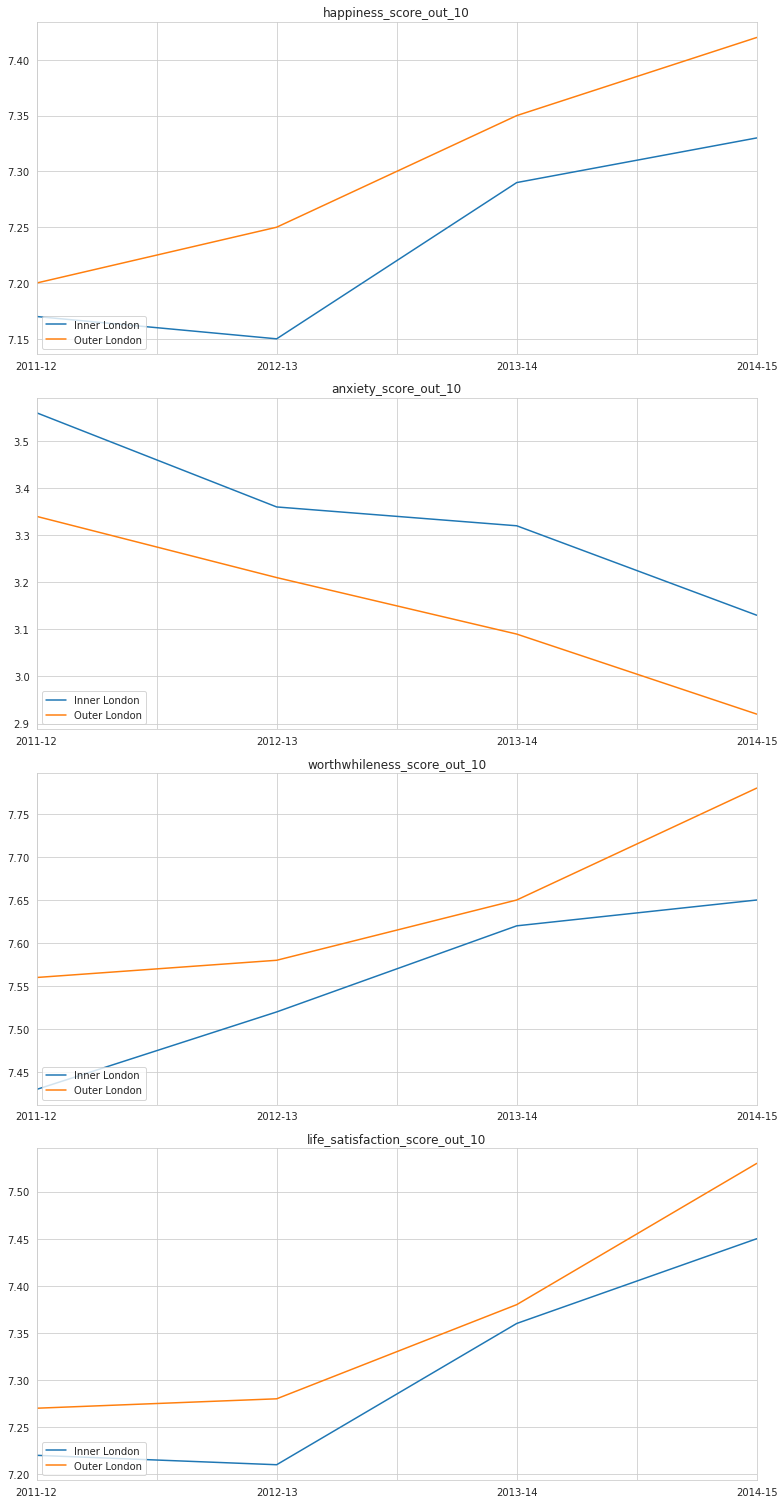

In [9]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(figsize=(11, 21), nrows=len(dfs), ncols=1)

    for ax, (key, df) in zip(axes, dfs.items()):
#         df['London'].plot(ax=ax)
        df['Inner London'].plot(ax=ax)
        df['Outer London'].plot(ax=ax)
#         df['England'].plot(ax=ax)
#         df['United Kingdom'].plot(ax=ax)
        ax.legend(loc='lower left')
        ax.set_title(key)
    
    plt.tight_layout()
    plt.show()